# GRIP: The Sparks Foundation

# Data Science and Business Analytics Intern

# Author: Sanket Pachghare

## Task 1: Prediction Using Supervised ML


### Problem Statement: Predict the percentage of an student based on the no. of study hours. 


##### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

#### Reading data

In [2]:
data = pd.read_csv("http://bit.ly/w-data")

In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# last 5 Records
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

#### Number of rows and columns

In [6]:
data.shape

(25, 2)

#### To find discriptive statistic 

In [7]:
data[['Hours', 'Scores']].describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


####  Missing values detection and Treatment

In [8]:
data.isna().any()

Hours     False
Scores    False
dtype: bool

#### Data visualisation 

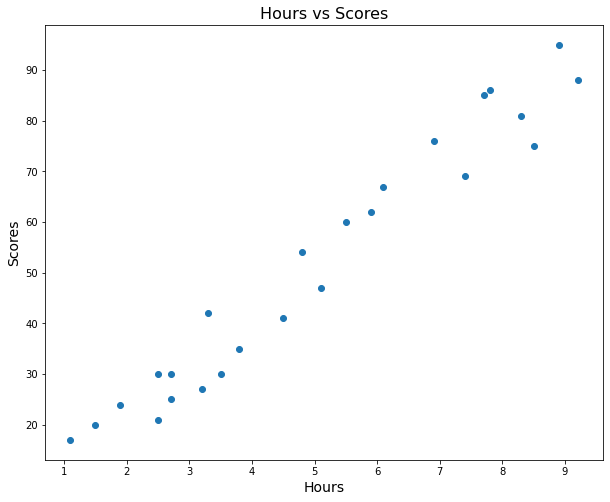

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(data['Hours'], data['Scores'])
ax.set_xlabel('Hours',fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
plt.title('Hours vs Scores', fontsize=16)
plt.show()


#### Preparing Data

In [10]:
x = data.drop(['Scores'], axis = 1)
y = data['Scores']

### Training the Model

#### Spliting data into training and testing dataset

In [11]:
# spliting Dataset
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=65)

In [12]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((20, 1), (20,), (5, 1), (5,))

### Linear Regression model
Fitting data into model

In [13]:
linearreg = LinearRegression()

In [14]:
linearreg.fit(xtrain, ytrain)
print("Model Training Completed")

Model Training Completed


#### Plotting Regression Line

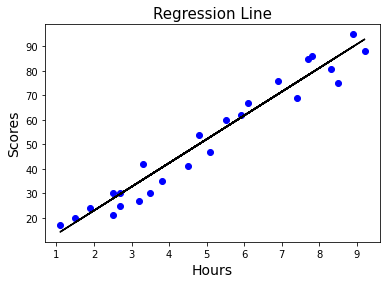

In [15]:
line = linearreg.coef_ * x + linearreg.intercept_  # LR equation

plt.scatter(x, y, color='blue')
plt.plot(x, line, color='black')
plt.title('Regression Line', fontsize=15)
plt.xlabel('Hours', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.show()

### Predicting Values

In [16]:
y_predict = linearreg.predict(xtest)

#### Comparing Actual Values and Predicted Values

In [17]:
dataFrame = pd.DataFrame(data={"Actual Values":ytest, "Predictions":y_predict})
dataFrame.head()

,Actual Values,Predictions
11,62,60.878936
15,95,90.003309
4,30,37.579439
3,75,86.120059
0,21,27.871315


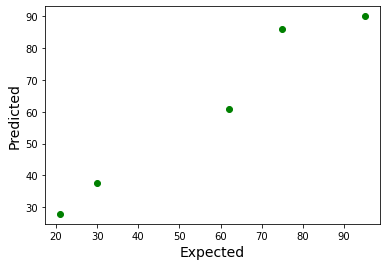

In [18]:
# plot Expected vs Predicted , i.e. ytest vs y_predict
plt.scatter(ytest,y_predict, color = 'green')
plt.xlabel('Expected',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.show()


### Predicted score if a student studies for 9.25 hrs/day

In [19]:
linearreg.score(xtest, ytest)


0.9333170183536916

In [20]:
hours = np.array([9.25])
prediction = linearreg.predict(hours.reshape(-1, 1))
print('No of Hours = {}'.format(hours[0]))
print("Predicted Score = {:.2f} %".format(prediction[0]))

No of Hours = 9.25
Predicted Score = 93.40 %


### Accuracy and Error

In [21]:
# mean absolute error
mean = mean_absolute_error(ytest, y_predict)
print('Mean Absolute Error',mean)

Mean Absolute Error 6.337713493850687


In [22]:
# mean squared error
mean_sq = mean_squared_error(ytest, y_predict)
print('Mean Squared Error', mean_sq)

Mean Squared Error 50.908455508057685


In [23]:
from sklearn.metrics import r2_score
print('R-2',r2_score(ytest, y_predict))

R-2 0.9333170183536916


R-2 gives Score of Model Fit, for this model it is 93.35%.

In [24]:
df1 = dataFrame.head()

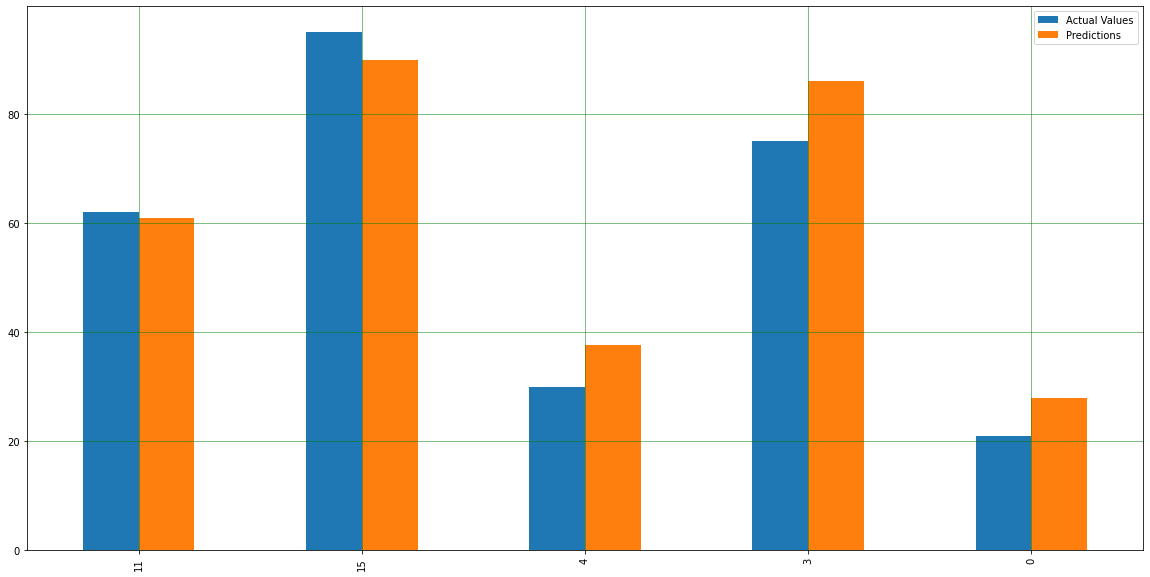

In [25]:
df1.plot(kind='bar', figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

From the above graph we can observe the difference between Actual Values and Predictions

#### From above Prediction Model, Predicted Score of the student who stuided for 9.25 hours/day is 93.40

#### I was successfully able to carry-out Prediction using Supervised ML task.